# Artificial Neural Network for Text Analytics and NLP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk.corpus as nl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import itertools
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Text Analytics

In [2]:
# Code to start the timer to see how long it takes to extract the features
startTime = datetime.now()

In [3]:
messages=pd.read_csv("sms.csv")

In [4]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
messages['message'][30]

"Wait that's still not all that clear, were you not sure about me being sarcastic or that that's why x doesn't want to live with us"

In [8]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [9]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:ylabel='Frequency'>

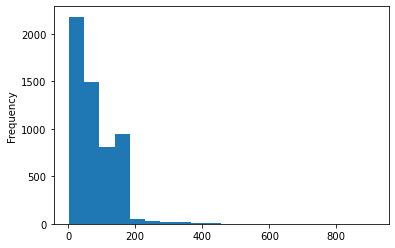

In [10]:
messages['length'].plot(bins=20, kind='hist')

In [11]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [12]:
messages[messages['length'] == 2]['message'].iloc[0]

'Ok'

In [13]:
messages[messages['length'] == 62]['message'].iloc[0]

'Hey... Why dont we just go watch x men and have lunch... Haha '

In [14]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

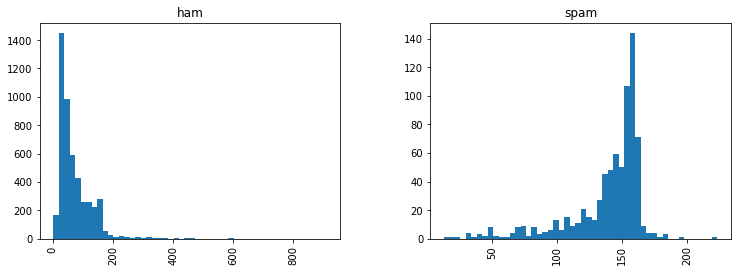

In [15]:
messages.hist(column='length', by='label', bins=50,figsize=(12,4))

# 2. Text Pre-processing

In [16]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in nl.stopwords.words('english')]

In [17]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [18]:
# Show original dataframe
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# 3. Vectorization

In [19]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [20]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [21]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [22]:
bow4

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

(array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 11425 BarContainer objects>)

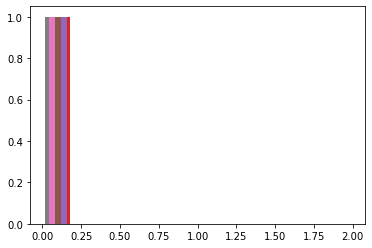

In [23]:
plt.hist(bow4.todense())

In [24]:
bow4.toarray()

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
bow4.toarray().max()

2

In [26]:
b4 = bow4.toarray()[0]
b4

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
np.where(b4 > 0)

(array([4068, 4629, 5261, 6204, 6222, 7186, 9554], dtype=int64),)

In [28]:
b4 = b4[np.where(b4 > 0)]
b4

array([2, 1, 1, 1, 1, 1, 2], dtype=int64)

(array([5., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <BarContainer object of 10 artists>)

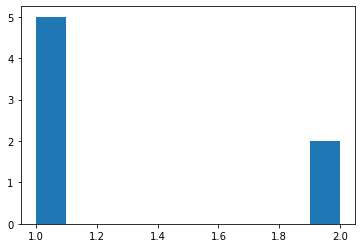

In [29]:
plt.hist(b4)

In [30]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
messages22 = messages.copy()

In [32]:
messages22['bow'] = messages['message'].apply(lambda x: bow_transformer.transform([x]))

In [33]:
messages22['bow'][3]

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [34]:
max(messages22['bow'][3].toarray()[0])

2

In [35]:
messages22['max_occur'] = messages22['bow'].apply(lambda x: x.max())
messages22.head()

,label,message,length,bow,max_occur
0,ham,"Go until jurong point, crazy.. Available only ...",111,"(0, 1110)\t1\n (0, 1483)\t1\n (0, 2060)\t1...",1
1,ham,Ok lar... Joking wif u oni...,29,"(0, 2451)\t1\n (0, 3064)\t1\n (0, 7701)\t1...",1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"(0, 73)\t1\n (0, 423)\t1\n (0, 430)\t1\n ...",2
3,ham,U dun say so early hor... U c already then say...,49,"(0, 4068)\t2\n (0, 4629)\t1\n (0, 5261)\t1...",2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"(0, 2948)\t1\n (0, 4777)\t1\n (0, 6123)\t1...",1


In [36]:
messages22.sort_values(by='max_occur').tail(4)

,label,message,length,bow,max_occur
3881,ham,Hi juan. Im coming home on fri hey. Of course ...,159,"(0, 2225)\t1\n (0, 2350)\t1\n (0, 2352)\t1...",9
4870,ham,1. Tension face 2. Smiling face 3. Waste face ...,158,"(0, 292)\t1\n (0, 423)\t1\n (0, 543)\t1\n ...",10
3017,ham,"&lt;#&gt; is fast approaching. So, Wish u a v...",461,"(0, 605)\t1\n (0, 1022)\t1\n (0, 1164)\t1\...",14
1579,ham,How to Make a girl Happy? It's not at all diff...,611,"(0, 292)\t1\n (0, 423)\t1\n (0, 543)\t1\n ...",18


In [37]:
messages_bow = bow_transformer.transform(messages['message'])

In [38]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [39]:
# Code to see how long it took
print(datetime.now() - startTime)

0:04:38.049883


# 4. Data Preparation and Processing for NLP

In [40]:
# Code to start the timer to see how long it takes to extract the features
startTime = datetime.now()

In [41]:
# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

11425


In [42]:
bow4 = bow_transformer.transform(messages['message'])
print(bow4.shape)

(5572, 11425)


In [43]:
bow4

<5572x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 50548 stored elements in Compressed Sparse Row format>

In [44]:
arr = bow4.toarray()

In [45]:
X = arr
y = messages['label']

In [46]:
y=np.where(y =='spam', 1, y)
y=np.where(y =='ham', 0, y)

In [47]:
y = y.astype('float32')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [49]:
# Code to see how long it took
print(datetime.now() - startTime)

0:00:49.910633


# 5. Create an Artificial Neural Network for NLP

In [50]:
model = Sequential([
    Dense(units=16, input_shape=(11425,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                182816    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 183,426
Trainable params: 183,426
Non-trainable params: 0
_________________________________________________________________


# 6. Train an Artificial Neural Network for NLP

In [52]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [53]:
model.fit(x=X_train, y=y_train, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 3733 samples
Epoch 1/30
3733/3733 - 6s - loss: 0.6320 - accuracy: 0.8219
Epoch 2/30
3733/3733 - 1s - loss: 0.3992 - accuracy: 0.8848
Epoch 3/30
3733/3733 - 1s - loss: 0.2048 - accuracy: 0.9523
Epoch 4/30
3733/3733 - 1s - loss: 0.1090 - accuracy: 0.9802
Epoch 5/30
3733/3733 - 1s - loss: 0.0634 - accuracy: 0.9879
Epoch 6/30
3733/3733 - 1s - loss: 0.0402 - accuracy: 0.9922
Epoch 7/30
3733/3733 - 1s - loss: 0.0275 - accuracy: 0.9946
Epoch 8/30
3733/3733 - 1s - loss: 0.0198 - accuracy: 0.9962
Epoch 9/30
3733/3733 - 1s - loss: 0.0148 - accuracy: 0.9971
Epoch 10/30
3733/3733 - 1s - loss: 0.0114 - accuracy: 0.9973
Epoch 11/30
3733/3733 - 1s - loss: 0.0088 - accuracy: 0.9979
Epoch 12/30
3733/3733 - 1s - loss: 0.0069 - accuracy: 0.9981
Epoch 13/30
3733/3733 - 1s - loss: 0.0054 - accuracy: 0.9987
Epoch 14/30
3733/3733 - 1s - loss: 0.0043 - accuracy: 0.9992
Epoch 15/30
3733/3733 - 1s - loss: 0.0035 - accuracy: 0.9992
Epoch 16/30
3733/3733 - 1s - loss: 0.0029 - accuracy: 0.9992
Epoch 17/30

# 7. Build a Validation Set for NLP

In [54]:
model.fit(x=X_train, y=y_train, validation_split= 0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Train on 3359 samples, validate on 374 samples
Epoch 1/30
3359/3359 - 8s - loss: 3.5970e-04 - accuracy: 0.9997 - val_loss: 2.3297e-04 - val_accuracy: 1.0000
Epoch 2/30
3359/3359 - 3s - loss: 3.3067e-04 - accuracy: 0.9997 - val_loss: 2.1723e-04 - val_accuracy: 1.0000
Epoch 3/30
3359/3359 - 3s - loss: 3.0522e-04 - accuracy: 1.0000 - val_loss: 2.0371e-04 - val_accuracy: 1.0000
Epoch 4/30
3359/3359 - 3s - loss: 2.8378e-04 - accuracy: 1.0000 - val_loss: 1.9170e-04 - val_accuracy: 1.0000
Epoch 5/30
3359/3359 - 3s - loss: 2.6410e-04 - accuracy: 1.0000 - val_loss: 1.8138e-04 - val_accuracy: 1.0000
Epoch 6/30
3359/3359 - 3s - loss: 2.4633e-04 - accuracy: 1.0000 - val_loss: 1.7453e-04 - val_accuracy: 1.0000
Epoch 7/30
3359/3359 - 4s - loss: 2.3032e-04 - accuracy: 1.0000 - val_loss: 1.6482e-04 - val_accuracy: 1.0000
Epoch 8/30
3359/3359 - 3s - loss: 2.1671e-04 - accuracy: 1.0000 - val_loss: 1.5787e-04 - val_accuracy: 1.0000
Epoch 9/30
3359/3359 - 3s - loss: 2.0412e-04 - accuracy: 1.0000 - val_los

# 8. Neural Network Predictions for NLP

In [55]:
predictions = model.predict(x=X_test, batch_size=10, verbose=0)

In [56]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [57]:
y_pred=rounded_predictions

# 9. Create a Confusion Matrix for Neural Network Predictions

In [58]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1593    0]
 [  24  222]]


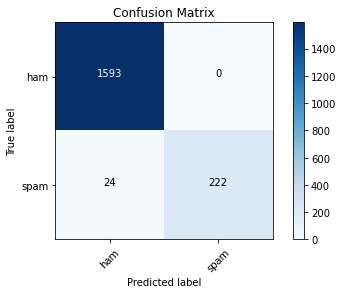

In [60]:
cm_plot_labels = ['ham', 'spam']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [61]:
print("\033[1m The result is telling us that we have: ",(cm[0,0]+cm[1,1]),"correct predictions.")
print("\033[1m The result is telling us that we have: ",(cm[0,1]+cm[1,0]),"incorrect predictions.")
print("\033[1m We have a total predictions of: ",(cm.sum()))

 The result is telling us that we have:  1815 correct predictions.
 The result is telling us that we have:  24 incorrect predictions.
 We have a total predictions of:  1839


# 9. Create a Classification Report for Neural Network Predictions

In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1593
         1.0       1.00      0.90      0.95       246

    accuracy                           0.99      1839
   macro avg       0.99      0.95      0.97      1839
weighted avg       0.99      0.99      0.99      1839



In [63]:
from sklearn import metrics
#calculate Accuracy, how often is the classifier correct?
print("Accuracy of the Artificial Neural Network model on the test set:", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))
print("\nWell, you got a classification rate of", "{:.2%}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy of the Artificial Neural Network model on the test set: 98.69%

Well, you got a classification rate of 98.69%


In [64]:
#calculate Precision
print("Precision of the Artificial Neural Network model:", "{:.2%}".format(metrics.precision_score(y_test, y_pred)))
print("\nPrecision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Artificial Neural Network model predicted a message is a spam, that message is actually a spam", "{:.2%}".format(metrics.precision_score(y_test, y_pred)), "of the time.")

Precision of the Artificial Neural Network model: 100.00%

Precision: Precision is about being precise, i.e., how precise our model is. In other words, we can say, when a model makes a prediction, how often it is correct. In our prediction case, when our Artificial Neural Network model predicted a message is a spam, that message is actually a spam 100.00% of the time.


In [65]:
#calculate Recall
print("Recall of the Artificial Neural Network model:", "{:.2%}".format(metrics.recall_score(y_test, y_pred)))
print("\nRecall: If there is a spam message in the test set, our Artificial Neural Network model can identify it", "{:.2%}".format(metrics.recall_score(y_test, y_pred)), "of the time.")

Recall of the Artificial Neural Network model: 90.24%

Recall: If there is a spam message in the test set, our Artificial Neural Network model can identify it 90.24% of the time.


# 10. Create a ROC AUC Curve for Neural Network Predictions

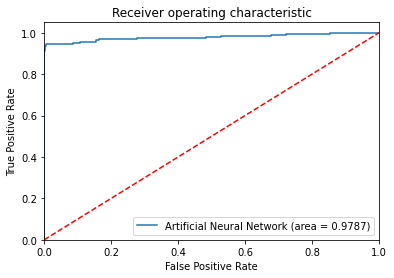

In [66]:
ann_roc_auc = roc_auc_score(y_test, model.predict(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Artificial Neural Network (area = %0.4f)' % ann_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

# 11. Save and Load a Model with TensorFlow's Keras API

## 1. model.save()

In [67]:
# Checks first to see if file exists already
# If not, the model is saved to disk.
import os.path
if os.path.isfile('C:\\Users\\רועי\\models\\nlp_model.h5') is False:
    model.save('C:\\Users\\רועי\\models\\nlp_model.h5')

This save functions saves:

   * The architecture of the model allowing to re-create the moddel.
   * The weights of the model.
   * The training configuration (loss, optimizer).
   * The state of the optimizer, allowing to resume training exactly where you left off.

In [68]:
from tensorflow.keras.models import load_model
new_model = load_model('C:\\Users\\רועי\\models\\nlp_model.h5')

In [69]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                182816    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 183,426
Trainable params: 183,426
Non-trainable params: 0
_________________________________________________________________


In [70]:
new_model.get_weights()

[array([[-0.00349818,  0.02331863, -0.00997902, ..., -0.02180791,
          0.03002522,  0.01739539],
        [ 0.02063355,  0.0143314 , -0.01060511, ...,  0.00224709,
          0.00769261, -0.01027697],
        [ 0.00958228,  0.03054796, -0.0135802 , ...,  0.02043218,
          0.0145161 ,  0.01637409],
        ...,
        [-0.01456076, -0.0009247 ,  0.00368516, ..., -0.00460651,
          0.03674729, -0.00349801],
        [-0.00434685, -0.00739431,  0.01655012, ...,  0.03013261,
         -0.00311162,  0.02436938],
        [ 0.00267601,  0.01773748,  0.01485001, ...,  0.01531227,
         -0.00735064,  0.00077609]], dtype=float32),
 array([0.13745245, 0.17144056, 0.13613822, 0.062147  , 0.08827011,
        0.1646385 , 0.06005477, 0.1512127 , 0.13846332, 0.14556058,
        0.13615246, 0.15703103, 0.033029  , 0.14697875, 0.02425121,
        0.1880577 ], dtype=float32),
 array([[-1.18083902e-01,  1.86483040e-02, -1.81068003e-01,
          1.05132855e-01, -3.44635919e-02,  6.09248519e-0

In [71]:
new_model.optimizer

## 2. model.to_json()

if you only need to save architecture of a model, and not its weights or its training configuration, you can see the following function to save the architecture only.

In [72]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [73]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 11425], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "

In [74]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [75]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                182816    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 183,426
Trainable params: 183,426
Non-trainable params: 0
_________________________________________________________________


## 3. model.save_weights()

If you only need to save the weights of the model, you cab use the following function save the weights only.

In [76]:
model.save_weights('C:\\Users\\רועי\\models\\my_model_weights.h5')

In [77]:
model2 = Sequential([
    Dense(units=16, input_shape=(11425,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [78]:
model2.load_weights('C:\\Users\\רועי\\models\\my_model_weights.h5')

In [79]:
model2.get_weights()

[array([[ 3.2384202e-02,  2.9407142e-02, -2.0365588e-02, ...,
          3.3417335e-04,  1.3976080e-02, -2.2236150e-02],
        [ 1.9887974e-02, -2.0863466e-02,  2.1030428e-02, ...,
         -6.2731281e-03, -6.3871797e-03,  2.0391116e-02],
        [ 2.2287413e-02,  4.3631368e-03, -1.9075319e-02, ...,
         -2.4780285e-02,  2.8591533e-03, -2.0999756e-02],
        ...,
        [ 2.9168790e-02,  1.2270964e-02, -2.6219038e-02, ...,
          9.8984232e-03,  2.5960574e-02, -1.0464420e-02],
        [-1.4106738e-02, -8.2333526e-03,  3.1875677e-02, ...,
          3.2654267e-02,  7.8003877e-03,  1.1770803e-02],
        [ 1.6459750e-02, -2.1147385e-02, -1.7638665e-02, ...,
         -3.9149467e-03,  1.9448120e-03,  6.3665211e-06]], dtype=float32),
 array([ 0.03227106,  0.0408613 ,  0.15019794,  0.19712113,  0.03898662,
        -0.01693016,  0.0227627 ,  0.1940998 ,  0.17075156,  0.16886537,
         0.1526093 ,  0.04949359,  0.16121812,  0.2148628 ,  0.04848313,
         0.2314656 ], dtype=flo